### iris data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = sns.load_dataset('iris')

#### 요약 통계 정보 출력

In [3]:
data.shape # dataframe shapes

(150, 5)

In [5]:
print(data.info()) # data information, datafrmae methods

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


describe method를 이용해 평균, 표준편차, 최소값, 최대값, 분위수를 출력해준다

In [6]:
print(data.describe()) # describe data, 요약통계량 출력

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Preprocessing

`replace()` method를 사용하면 label encoding을 진행할 수 있다

In [8]:
data['species'].replace(
    {
        'setosa' : 0,
        'versicolor' : 1,
        'virginica' : 2
    },
    inplace = True
)

In [10]:
data['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

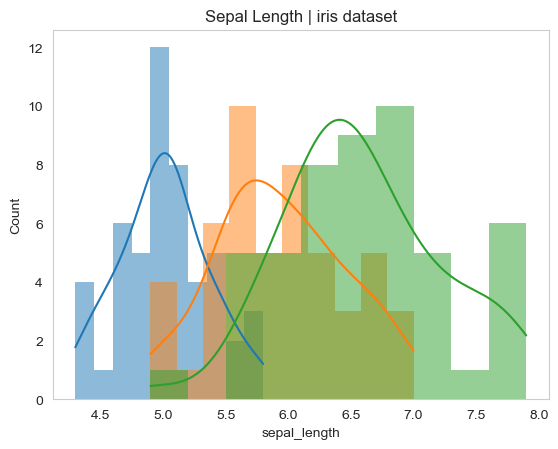

In [18]:
sns.histplot(
    data.loc[data['species'] == 0, 'sepal_length'], 
    edgecolor = 'none', 
    bins = 10,
    kde = True
)
sns.histplot(
    data.loc[data['species'] == 1, 'sepal_length'], 
    edgecolor = 'none', 
    bins = 10,
    kde = True
)
sns.histplot(
    data.loc[data['species'] == 2, 'sepal_length'], 
    edgecolor = 'none', 
    bins = 10,
    kde = True
)

plt.grid(False)
plt.title('Sepal Length | iris dataset')
plt.show()

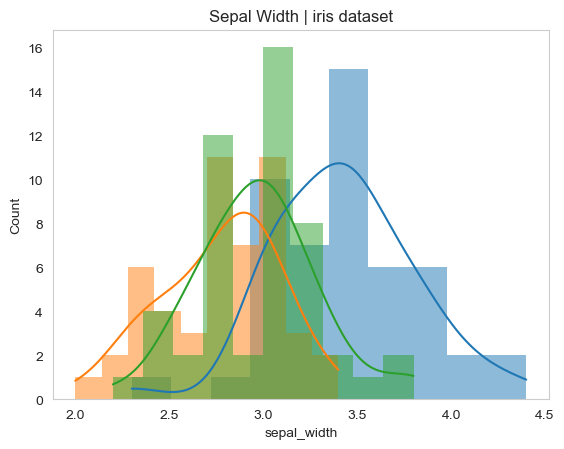

In [20]:
sns.histplot(
    data.loc[data['species'] == 0, 'sepal_width'], 
    edgecolor = 'none', 
    bins = 10,
    kde = True
)
sns.histplot(
    data.loc[data['species'] == 1, 'sepal_width'], 
    edgecolor = 'none', 
    bins = 10,
    kde = True
)
sns.histplot(
    data.loc[data['species'] == 2, 'sepal_width'], 
    edgecolor = 'none', 
    bins = 10,
    kde = True
)

plt.grid(False)
plt.title('Sepal Width | iris dataset')
plt.show()

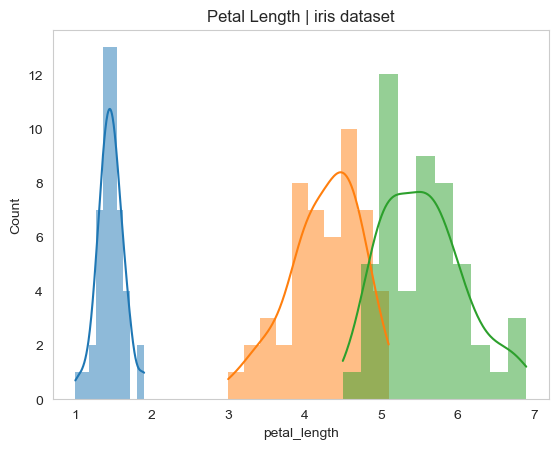

In [21]:
sns.histplot(
    data.loc[data['species'] == 0, 'petal_length'], 
    edgecolor = 'none', 
    bins = 10,
    kde = True
)
sns.histplot(
    data.loc[data['species'] == 1, 'petal_length'], 
    edgecolor = 'none', 
    bins = 10,
    kde = True
)
sns.histplot(
    data.loc[data['species'] == 2, 'petal_length'], 
    edgecolor = 'none', 
    bins = 10,
    kde = True
)

plt.grid(False)
plt.title('Petal Length | iris dataset')
plt.show()

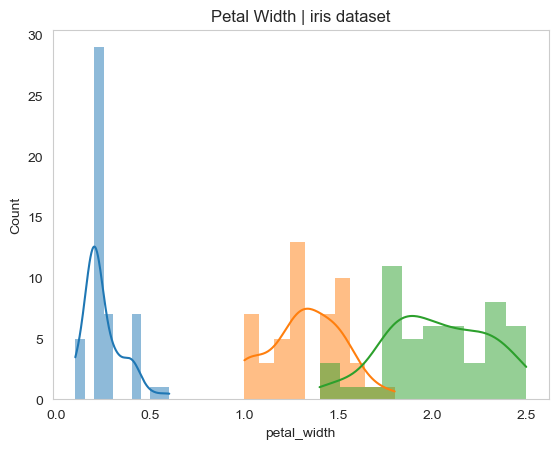

In [22]:
sns.histplot(
    data.loc[data['species'] == 0, 'petal_width'], 
    edgecolor = 'none', 
    bins = 10,
    kde = True
)
sns.histplot(
    data.loc[data['species'] == 1, 'petal_width'], 
    edgecolor = 'none', 
    bins = 10,
    kde = True
)
sns.histplot(
    data.loc[data['species'] == 2, 'petal_width'], 
    edgecolor = 'none', 
    bins = 10,
    kde = True
)

plt.grid(False)
plt.title('Petal Width | iris dataset')
plt.show()

### Data Split

In [23]:
from sklearn.model_selection import train_test_split

X = data.drop(['species'], axis = 1)
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    shuffle = True, 
    random_state = 42
)

In [24]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### Modeling

Modeling을 위해 sklearn의 모형으로 진행한다

#### Support Vector Machine

In [27]:
from sklearn.svm import SVC

svm = SVC(
    kernel = 'linear',
    C = 1.0,
    random_state = 42
)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix

svm_pred = svm.predict(X_test)
print(f'Accuracy of Support Vector Machine : {accuracy_score(y_test, svm_pred) : .4f}')

Accuracy of Support Vector Machine :  1.0000


In [30]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
multilabel_confusion_matrix(y_test, svm_pred)

array([[[20,  0],
        [ 0, 10]],

       [[21,  0],
        [ 0,  9]],

       [[19,  0],
        [ 0, 11]]])

#### Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [33]:
naive_bayes_pred = naive_bayes.predict(X_test)
print(f'Accuracy of Support Vector Machine : {accuracy_score(y_test, naive_bayes_pred) : .4f}')

Accuracy of Support Vector Machine :  1.0000


In [34]:
print(classification_report(y_test, naive_bayes_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
multilabel_confusion_matrix(y_test, naive_bayes_pred)

array([[[20,  0],
        [ 0, 10]],

       [[21,  0],
        [ 0,  9]],

       [[19,  0],
        [ 0, 11]]])